In [2]:
import time 
import sys
from blu import *  
# True parameters
data=np.load(data_dir+'/catalog/m1m2zxeff_posterior_138_lensed.npz')
m1,m2,redshift,xeff = data['m1'],data['m2'],data['redshift'], data['xeff'] 
del data
# posterior samples 
with open('./posterior/img1_det_m1m2xeff.pkl', 'rb') as f:
    img1=dill.load(f)
with open('./posterior/img2_det_m1m2xeff.pkl', 'rb') as f:
    img2=dill.load(f)
# population models 

# uniform distribution
with open('./pop_prior/uniform_pop_m1m2xeff.pkl', 'rb') as f:
    pop_uni=dill.load(f)
with open('./pop_prior/astro_m1m2chieff.pkl', 'rb') as f:
    pop_model=dill.load(f)

pop_true = mix_pop('./pop_prior/real_dist.pkl')
pop_power = mix_pop('./pop_prior/PL_pdf.pkl',wide=True)
N = 2e4
OLU = OddsRatio(gw_pop=pop_model,Nmc=N)
OLU_true = OddsRatio(gw_pop=pop_true,Nmc=N)
OLU_pl = OddsRatio(gw_pop=pop_power,Nmc=N)
OLU_uni = OddsRatio(gw_pop=pop_uni,Nmc=N)
#OLU_obs = OddsRatio(gw_pop=pop_obs,Nmc=N)

load_data = True 
if load_data:
    data = np.load('blu_data_v2.npz')
    blu_true = data['bt']
    blu_hdpgmm = data['bh']
    blu_pl = data['bp']
    blu_uni = data['bu']
    
data=np.load(data_dir+'/catalog/PowerlawplusPeakplusDelta30000Samples.npz')
m1s,m2s,zs = data['m1'],data['m2'],data['redshift']
data=np.load(data_dir+'/catalog/Catalog_30000Samples_afterSelection.npz')
m1obs,m2obs,zobs = data['m1'],data['m2'],data['redshift']

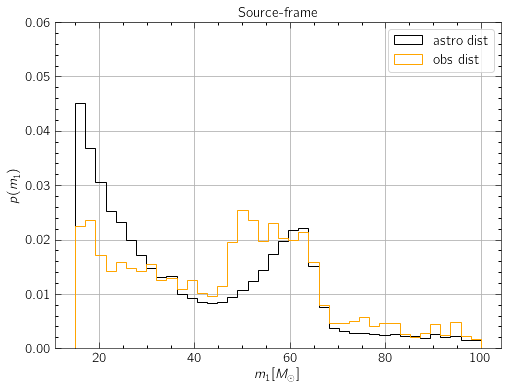

In [3]:
from marginal_plt import *

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(m1s,bins=40,range=(15,100),density=True,histtype='step',label='astro dist',color='black')
ax.hist(m1obs,bins=40,range=(15,100),density=True,histtype='step',label='obs dist',color='orange')
ax.set_title('Source-frame',fontsize=14)
ax.set_ylabel(r'$p(m_1)$',fontsize=14)
ax.set_xlabel(r'$m_1 [M_{\odot}]$',fontsize=14)
ax.grid(True)
ax.legend(fontsize=14)
ax.set_ylim(0,0.06)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('srcm1.pdf',bbox_inches = 'tight')

# Marginal det-frame m1 plot for $m_1^z \in (15,160)$ and similar to $m_1^z \in (15,225), ( m_1, q, \chi_{\mathrm{eff}})$ grid:  
## Benchmark pdf matches with HDPGMM's median but no second peak and doesnt match with hist data

Astro Dists: 100%|██████████████████████████| 1000/1000 [01:37<00:00, 10.22it/s]


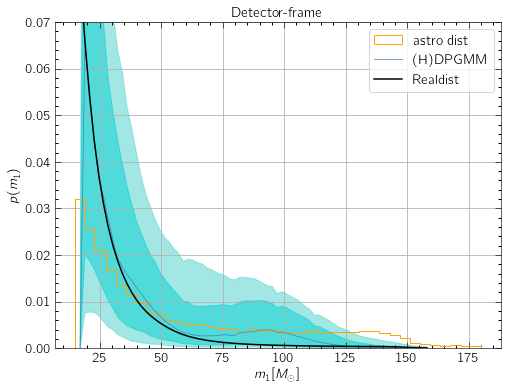

In [4]:
z_bds  = [0.01,1.3]
xlim = [15*(1+z_bds[0]), 160]
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(m1s*(1+zs),bins=40,range=(15,180),density=True,histtype='step',label='astro dist',color='orange')
hdpgmm_plt(ax, pop_model, 3, benchmark= pop_true, plt_lim=xlim)
ax.set_title('Detector-frame',fontsize=14)
ax.set_ylabel(r'$p(m_1)$',fontsize=14)
ax.set_xlabel(r'$m_1 [M_{\odot}]$',fontsize=14)
ax.grid(True)
ax.legend(fontsize=14)
ax.set_ylim(0,0.07)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('detm1_'+str(int(xlim[0]))+'_'+str(int(xlim[1]))+'.pdf',bbox_inches = 'tight')

# Marginal det-frame m1 plot $m_1^z \in (5,225), ( m_1, q, \chi_{\mathrm{eff}})$ grid, no second peak:

Astro Dists: 100%|██████████████████████████| 1000/1000 [01:39<00:00, 10.06it/s]


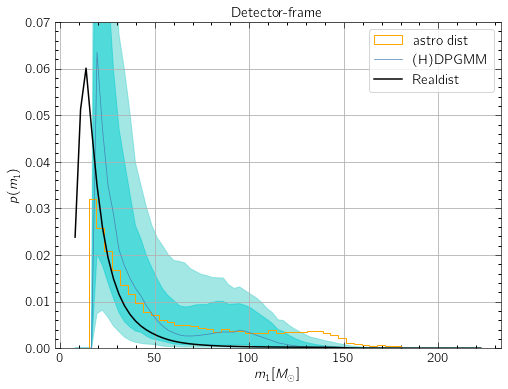

In [5]:
z_bds  = [0.01,1.3]
xlim = [5, 98*(1+z_bds[1])]
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(m1s*(1+zs),bins=40,range=(15,180),density=True,histtype='step',label='astro dist',color='orange')
hdpgmm_plt(ax, pop_model, 3, benchmark= pop_true, plt_lim=xlim)
ax.set_title('Detector-frame',fontsize=14)
ax.set_ylabel(r'$p(m_1)$',fontsize=14)
ax.set_xlabel(r'$m_1 [M_{\odot}]$',fontsize=14)
ax.grid(True)
ax.legend(fontsize=14)
ax.set_ylim(0,0.07)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('detm1_'+str(int(xlim[0]))+'+_'+str(int(xlim[1]))+'.pdf',bbox_inches = 'tight')

# Marginal det-frame m1 plot $m_1^z \in (5,225), ( m_1, m_2, \chi_{\mathrm{eff}})$ grid:
## Benchmark pdf matches with hist data: 

Astro Dists: 100%|██████████████████████████| 1000/1000 [01:46<00:00,  9.35it/s]


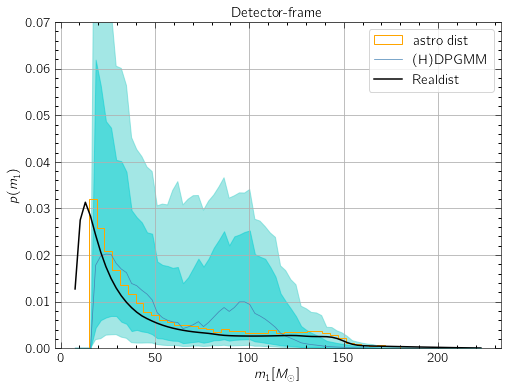

In [4]:
z_bds  = [0.01,1.3]
xlim = [5,98*(1+z_bds[1])]
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(m1s*(1+zs),bins=40,range=(15,180),density=True,histtype='step',label='astro dist',color='orange')
hdpgmm_plt_regulargrid(ax, pop_model, 3, benchmark= pop_true, plt_lim=xlim)
ax.set_title('Detector-frame',fontsize=14)
ax.set_ylabel(r'$p(m_1)$',fontsize=14)
ax.set_xlabel(r'$m_1 [M_{\odot}]$',fontsize=14)
ax.grid(True)
ax.legend(fontsize=14)
ax.set_ylim(0,0.07)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('detm1_'+str(int(xlim[0]))+'_'+str(int(xlim[1]))+'_m1m2x.pdf',bbox_inches = 'tight')

In [3]:
data=np.load(data_dir+'/catalog/m1m2zxeff_posterior_138_lensed.npz')
m1,m2,redshift,xeff = data['m1'],data['m2'],data['redshift'], data['xeff'] 
m1z = m1z=m1*(1+redshift)
m1z = m1z[:int(m1z.size/2)]
index = np.where(m1z<125)[0]

In [5]:
blu_uni=[]
blu_true=[]
blu_hdpgmm=[]
blu_pl=[]
#blu_obs=[]

for i in tqdm(index, total = int(index.size), desc = 'BLU-lensed pair'):
    blu_true.append(OLU_true.BayesFactor_PEuniform(img1[i],img2[i]))
    blu_hdpgmm.append(OLU.BayesFactor_PEuniform(img1[i],img2[i]))
    blu_pl.append(OLU_pl.BayesFactor_PEuniform(img1[i],img2[i]))
    blu_uni.append(OLU_uni.BayesFactor_PEuniform(img1[i],img2[i]))
#    blu_obs.append(OLU_obs.BayesFactor_PEuniform(img1[i],img2[i]))

blu_true = np.array(blu_true)
blu_hdpgmm = np.array(blu_hdpgmm)
blu_pl = np.array(blu_pl)
blu_uni = np.array(blu_uni)
#blu_obs = np.array(blu_obs)

#blu_true = log_blu(blu_true)
#blu_hdpgmm = log_blu(blu_hdpgmm)
#blu_pl = log_blu(blu_pl)
#blu_uni = log_blu(blu_uni)
#blu_obs = log_blu(blu_obs)


BLU-lensed pair: 100%|██████████████████████████| 37/37 [12:09<00:00, 19.72s/it]


In [35]:
np.savez('blu_data_125_nlog.npz',bt=blu_true, bh=blu_hdpgmm, bp=blu_pl , bu=blu_uni)

In [21]:
# test uncertainty 
test_index = [6,33]

test_hdpgmm=[]
#blu_obs=[]
OLU = OddsRatio(gw_pop=pop_model,Nmc=N)
for i in tqdm(range(30), total = 30, desc = 'BLU-lensed pair'):
    test_hdpgmm.append(OLU.BayesFactor_PEuniform(img1[test_index[0]],img2[test_index[0]]))
test_hdpgmm = np.array(test_hdpgmm)
#blu_obs = np.array(blu_obs)
#blu_true = log_blu(blu_true)
#blu_hdpgmm = log_blu(blu_hdpgmm)
#blu_pl = log_blu(blu_pl)
#blu_uni = log_blu(blu_uni)
#blu_obs = log_blu(blu_obs)


BLU-lensed pair: 100%|██████████████████████████| 30/30 [08:54<00:00, 17.81s/it]


Astro Dists: 100%|██████████████████████████| 1000/1000 [01:47<00:00,  9.31it/s]


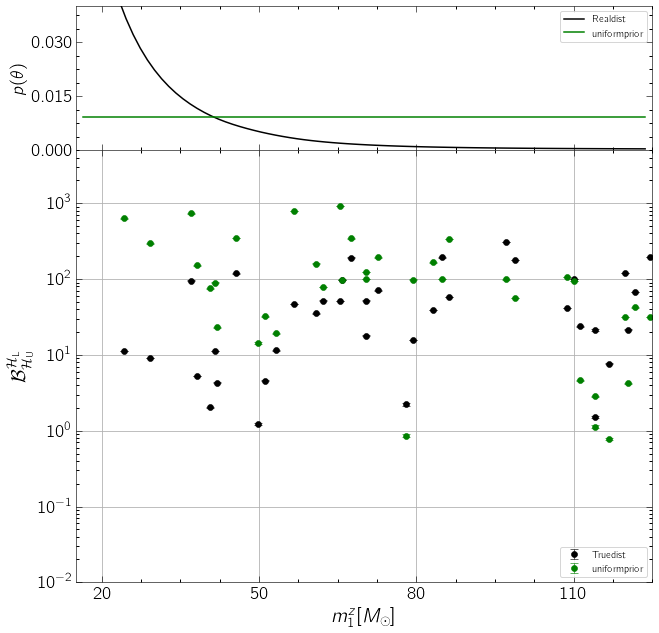

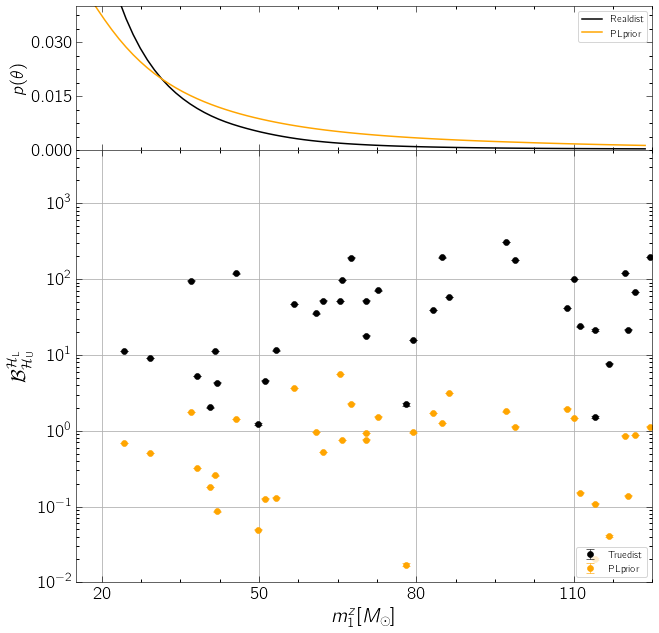

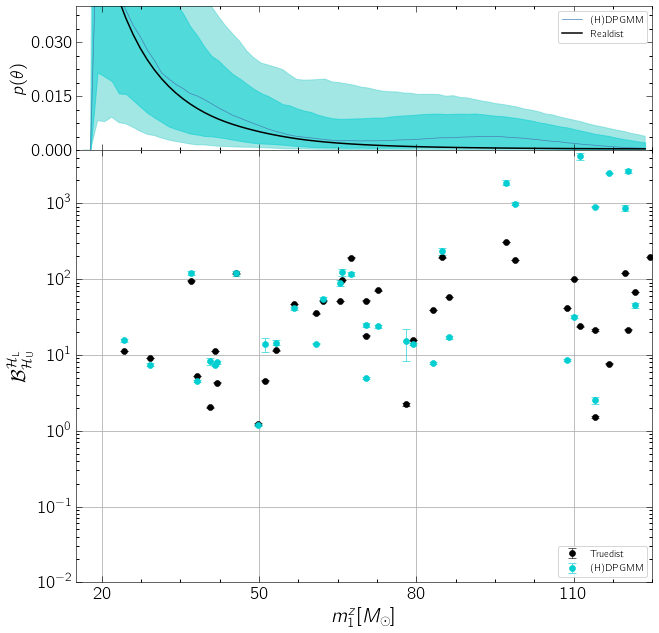

In [34]:

from marginal_plt import *
%matplotlib inline

data=np.load(data_dir+'/catalog/m1m2zxeff_posterior_138_lensed.npz')
m1,m2,redshift,xeff = data['m1'],data['m2'],data['redshift'], data['xeff'] 
m1z = m1z=m1*(1+redshift)
m1z = m1z[:int(m1z.size/2)]
index = np.where(m1z<125)[0]
m1z=m1z[index]
math_blu = '$ \mathcal{B}_{\mathcal{H}_{\mathrm{U}}}^{\mathcal{H}_{\mathrm{L}}}$'

z_bds  = [0.01,1.3]
lim = [15*(1+z_bds[0]), 125]
#xlim=(15.2,250)
xlim=lim
#ylim=(-2.1,4.3)
ylim=(1e-2,5e3)

n = blu_true.shape[0]
plotting_two(blu_true[:n], blu_uni[:n],pop_model,
             pop_true,pop_power, m1z[:n],math_blu,
             real_dist=True,uni_dist=True,xlim=xlim,ylim=ylim,scale_log=True)
plt.savefig('blu_uni_n.pdf',bbox_inches = 'tight')
#ylim=(0,3.1)
plotting_two(blu_true[:n], blu_pl[:n],pop_model,
             pop_true,pop_power, m1z[:n],math_blu,
             real_dist=True,PL_dist=True,xlim=xlim,ylim=ylim,scale_log=True)
plt.savefig('blu_pl_n.pdf',bbox_inches = 'tight')
#ylim=(0.5,2.26)
#ylim=(0,5.1)
plotting_two(blu_true[:n], blu_hdpgmm[:n],pop_model,
             pop_true,pop_power, m1z[:n],math_blu,
             real_dist=True,HDPGMM_model=True,xlim=xlim,ylim=ylim,scale_log=True)
plt.savefig('blu_dpgmm_n.pdf',bbox_inches = 'tight')